## run this cell before starting spark cluster connection (corrects module error)

In [2]:
import os
print os.environ['PYSPARK_PYTHON']
os.environ['PYSPARK_PYTHON']=os.environ['LCG_VIEW'] + '/bin/python'
print os.environ['PYSPARK_PYTHON']

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python


### Import necessary spark and python stuff

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.ml.feature import VectorAssembler

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### select the data

In [5]:
df = spark.read.json("/user/rucio01/traces/traces.2018-05*")

### Create temporary table view

In [6]:
df.createOrReplaceTempView("traces")

### Use PySpark to query download events and split dataset DID into new features

In [7]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

### Official Data Only

In [8]:
df_ps = spark.sql("SELECT *\
                   FROM traces \
                   WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')")

In [9]:
df_ps.describe().toPandas()

summary _corrupt_record   account appid catStart         clientState  \
0  count   0               591845    0     0        591845               
1  mean    None            None      None  None     None                 
2  stddev  None            None      None  None     None                 
3  min     None            abell     None  None     CannotAuthenticate   
4  max     None            zmarshal  None  None     SourceNotFound       

                                                                                           dataset  \
0  591845                                                                                            
1  None                                                                                              
2  None                                                                                              
3  data12_8TeV.00200805.physics_MinBias.recon.NTUP_MINBIAS.r4768                                     
4  mc16_valid.361034.Pythia8EvtGen_A2MSTW2008LO_minbias_inelastic_low.merge.HITS.e3581_s3028_s2939   

  datasetName datasetScope dataset_scope  duid eventType        eventVersion  \
0  0           591845       0             0     591845    591845               
1  None        None         None          None  None      None                 
2  None        None         None          None  None      None                 
3  None        data12_8TeV  None          None  download  1.14.10              
4  None        mc16_valid   None          None  download  webui_1.16.0.post1   

                             filename              filesize  guid  \
0  591656                              591845                0      
1  None                                1.4308087476686785E9  None   
2  None                                2.189936936508778E9   None   
3  AOD.05341490._000446.pool.root.1    10000                 None   
4  log.14217468._003414.job.log.tgz.1  99999162              None   

                   hostname    ip localSite  \
0  591832                    0     0          
1  None                      None  None       
2  None                      None  None       
3  ReCaS-ui-01.cs.infn.it    None  None       
4  xenia.nevis.columbia.edu  None  None       

                                       name    pq protocol relativeStart  \
0  189                                       0     591845   0              
1  None                                      None  None     None           
2  None                                      None  None     None           
3  NTUP_PILEUP.11325280._000001.pool.root.1  None  davs     None           
4  NTUP_PILEUP.13279990._000009.pool.root.1  None  srm      None           

                  remoteSite   rse        scope stateReason suspicious taskid  \
0  591845                     0     591845       0           0          0       
1  None                       None  None         None        None       None    
2  None                       None  None         None        None       None    
3  AGLT2_CALIBDISK            None  data12_8TeV  None        None       None    
4  WUPPERTALPROD_SCRATCHDISK  None  mc16_valid   None        None       None    

  timeEnd timeStart                           traceId  \
0  0       0         591845                             
1  None    None      None                               
2  None    None      None                               
3  None    None      000006b4ce98452580a7493dba70ceb0   
4  None    None      ffffd5de42064e778bb14610ca50b1a6   

                     traceIp              traceTimeentry  \
0  591845                     591845                       
1  None                       None                         
2  None                       None                         
3  2001:1458:201:e4::100:28c  2018-04-30T22:00:33.301146   
4  ::ffff:91.239.204.45       2018-05-31T21:59:47.107225   

     traceTimeentryUnix          transferEnd         transferStart   url  \
0  591845                368549          

## add new column "hour"

In [10]:
#problem mit join lösen: einfach aus filename und hour/day eine neue spalte erstellen um drauf zu joinen
df_ps = df_ps.withColumn("hour", from_unixtime(df_ps['traceTimeentryUnix'], 'yyyy-MM-dd HH'))

In [11]:
df_ps.limit(10).toPandas()

_corrupt_record   account appid catStart         clientState  \
0  None            hegormse  None  None     ServiceUnavailable   
1  None            hegormse  None  None     DONE                 
2  None            hegormse  None  None     ServiceUnavailable   
3  None            hegormse  None  None     DONE                 
4  None            toyamaza  None  None     DONE                 
5  None            ysano     None  None     DONE                 
6  None            toyamaza  None  None     DONE                 
7  None            toyamaza  None  None     DONE                 
8  None            ysano     None  None     DONE                 
9  None            ysano     None  None     DONE                 

                                                                                                                          dataset  \
0  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
1  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
2  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
3  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
4  mc16_13TeV.364169.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV1000_E_CMS.deriv.DAOD_SUSY5.e5340_e5984_s3126_s3136_r10201_r10210_p3401   
5  data17_13TeV.periodI.physics_Main.PhysCont.DAOD_EXOT8.grp17_v01_p3481                                                            
6  mc16_13TeV.364169.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV1000_E_CMS.deriv.DAOD_SUSY5.e5340_e5984_s3126_s3136_r10201_r10210_p3401   
7  mc16_13TeV.364169.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV1000_E_CMS.deriv.DAOD_SUSY5.e5340_e5984_s3126_s3136_r10201_r10210_p3401   
8  data17_13TeV.periodD.physics_Main.PhysCont.DAOD_EXOT8.grp17_v01_p3481                                                            
9  data17_13TeV.periodI.physics_Main.PhysCont.DAOD_EXOT8.grp17_v01_p3481                                                            

  datasetName  datasetScope dataset_scope  duid eventType eventVersion  \
0  None        mc16_13TeV    None          None  download  1.14.11       
1  None        mc16_13TeV    None          None  download  1.14.11       
2  None        mc16_13TeV    None          None  download  1.14.11       
3  None        mc16_13TeV    None          None  download  1.14.11       
4  None        mc16_13TeV    None          None  download  1.14.11       
5  None        data17_13TeV  None          None  download  1.14.11       
6  None        mc16_13TeV    None          None  download  1.14.11       
7  None        mc16_13TeV    None          None  download  1.14.11       
8  None        data17_13TeV  None          None  download  1.14.11       
9  None        data17_13TeV  None          None  download  1.14.11       

                                   filename    filesize  guid  \
0  NTUP_PILEUP.12913234._000008.pool.root.1  10741       None   
1  NTUP_PILEUP.12913234._000008.pool.root.1  10741       None   
2  NTUP_PILEUP.12913234._000009.pool.root.1  10740       None   
3  NTUP_PILEUP.12913234._000009.pool.root.1  10740       None   
4  DAOD_SUSY5.13555633._000128.pool.root.1   965252921   None   
5  DAOD_EXOT8.13457653._000286.pool.root.1   1364376878  None   
6  DAOD_SUSY5.13555633._000126.pool.root.1   964510427   None   
7  DAOD_SUSY5.13555633._000127.pool.root.1   965368409   None   
8  DAOD_EXOT8.13457361._000269.pool.root.1   1428100740  None   
9  DAOD_EXOT8.13457653._000287.pool.root.1   1338445524  None   

            hostname    ip localSite  name    pq protocol relativeStart  \
0  lxplus079.cern.ch  None  None      None  None  root     None           
1  lxplus079.cern.ch  None  None      None  None  gsiftp   None           
2  lxplus079.cern.ch  None  None      None  None  root 

### drop columns that do not contain any values (or very little values, like 'name') based on previous describe()

In [12]:
df_ps = df_ps.drop('appid', 'catStart', 'datasetName', 'dataset_scope', 'duid', 
                   'guid', 'ip', 'localSite', 'pq', 'relativeStart', 'stateReason', 
                   'suspicious', 'taskid', 'timeEnd', 'timeStart', 'url', 'usr', 
                   'usrdn', 'validateStart', 'version', 'name')

## Drop empty Mai columns

In [13]:
df_ps = df_ps.drop('_corrupt_record', 'rse')

In [14]:
df_ps.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  filesize  hostname  protocol  remoteSite  scope  traceId  \
0  189       0         13        0         0           0      0         

   traceIp  traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  \
0  0        0               0                   223296       13              

   uuid  hour  
0  0     0

## Split dataset column

In [15]:
split_col = split(df_ps['dataset'], "\.")
df_ps = df_ps.withColumn('project', split_col.getItem(0))
df_ps = df_ps.withColumn('run_number', split_col.getItem(1))
df_ps = df_ps.withColumn('stream_name', split_col.getItem(2))
df_ps = df_ps.withColumn('prod_step', split_col.getItem(3))
df_ps = df_ps.withColumn('datatype', split_col.getItem(4))
df_ps = df_ps.withColumn('dataset_version', split_col.getItem(5))

In [16]:
df_ps.describe().toPandas()

summary   account         clientState  \
0  count   591845    591845               
1  mean    None      None                 
2  stddev  None      None                 
3  min     abell     CannotAuthenticate   
4  max     zmarshal  SourceNotFound       

                                                                                           dataset  \
0  591845                                                                                            
1  None                                                                                              
2  None                                                                                              
3  data12_8TeV.00200805.physics_MinBias.recon.NTUP_MINBIAS.r4768                                     
4  mc16_valid.361034.Pythia8EvtGen_A2MSTW2008LO_minbias_inelastic_low.merge.HITS.e3581_s3028_s2939   

  datasetScope eventType        eventVersion  \
0  591845       591845    591845               
1  None         None      None                 
2  None         None      None                 
3  data12_8TeV  download  1.14.10              
4  mc16_valid   download  webui_1.16.0.post1   

                             filename              filesize  \
0  591656                              591845                 
1  None                                1.4308087476686785E9   
2  None                                2.1899369365087776E9   
3  AOD.05341490._000446.pool.root.1    10000                  
4  log.14217468._003414.job.log.tgz.1  99999162               

                   hostname protocol                 remoteSite        scope  \
0  591832                    591845   591845                     591845        
1  None                      None     None                       None          
2  None                      None     None                       None          
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK            data12_8TeV   
4  xenia.nevis.columbia.edu  srm      WUPPERTALPROD_SCRATCHDISK  mc16_valid    

                            traceId                    traceIp  \
0  591845                            591845                      
1  None                              None                        
2  None                              None                        
3  000006b4ce98452580a7493dba70ceb0  2001:1458:201:e4::100:28c   
4  ffffd5de42064e778bb14610ca50b1a6  ::ffff:91.239.204.45        

               traceTimeentry   traceTimeentryUnix           transferEnd  \
0  591845                      591845               368549                 
1  None                        1.526197137534056E9  1.5262180473443408E9   
2  None                        718455.2485791168    700848.9125538518      
3  2018-04-30T22:00:33.301146  1.525125633301146E9  1.525125634043446E9    
4  2018-05-31T21:59:47.107225  1.527803987107225E9  1.527803986849469E9    

          transferStart                              uuid           hour  \
0  591832                591845                            591845          
1  1.5261970457356327E9  None                              None            
2  718450.7659714279     None                              None            
3  1.524860531819739E9   000397830f284c508523b44ed7d19aab  2018-05-01 00   
4  1.527803946887522E9   fffe0a61b053499da59d19fa07de8bbd  2018-05-31 23   

       project          run_number  \
0  591845       591845               
1  None         350074.32882978953   
2  None         47664.213127268245   
3  data12_8TeV  00200805             
4  mc16_valid   periodL              

                                   stream_name prod_step datatype  \
0  591845                                       591845    591845    
1  None                                         None      None      
2  None                                         None      None      
3  AlpgenJimmy_AUET2_CTEQ6L1_WenugammagammaNp0  PhysCont  AOD       
4  physics_ZeroBias                             simul     log       

  dataset_version  
0  589

In [17]:
df_ps.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  filesize  hostname  protocol  remoteSite  scope  traceId  \
0  189       0         13        0         0           0      0         

   traceIp  traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  \
0  0        0               0                   223296       13              

   uuid  hour  project  run_number  stream_name  prod_step  datatype  \
0  0     0     0        0           0            0          0          

   dataset_version  
0  2361

## Drop transferend due to many missing values

In [18]:
df_ps = df_ps.drop('transferEnd')

In [19]:
df_ps = df_ps.dropna()

## create new concatenated column to get a suitable join key
### vorher konnte man einfach auf den filenamen alleine joinen weil man für den monat ja die komplette anzahl für dieses file wollte und nicht pro stunde

In [20]:
df_ps.select(concat(df_ps["filename"], df_ps["hour"])).limit(10).toPandas()

concat(filename, hour)
0  NTUP_PILEUP.12913234._000008.pool.root.12018-05-01 00
1  NTUP_PILEUP.12913234._000008.pool.root.12018-05-01 00
2  NTUP_PILEUP.12913234._000009.pool.root.12018-05-01 00
3  NTUP_PILEUP.12913234._000009.pool.root.12018-05-01 00
4  DAOD_SUSY5.13555633._000128.pool.root.12018-05-01 00 
5  DAOD_EXOT8.13457653._000286.pool.root.12018-05-01 00 
6  DAOD_SUSY5.13555633._000126.pool.root.12018-05-01 00 
7  DAOD_SUSY5.13555633._000127.pool.root.12018-05-01 00 
8  DAOD_EXOT8.13457361._000269.pool.root.12018-05-01 00 
9  DAOD_EXOT8.13457653._000287.pool.root.12018-05-01 00

In [21]:
df_ps = df_ps.withColumn("join_key_1", concat(df_ps["filename"], df_ps["hour"]))

In [22]:
df_ps.limit(10).toPandas()

account         clientState  \
0  hegormse  ServiceUnavailable   
1  hegormse  DONE                 
2  hegormse  ServiceUnavailable   
3  hegormse  DONE                 
4  toyamaza  DONE                 
5  ysano     DONE                 
6  toyamaza  DONE                 
7  toyamaza  DONE                 
8  ysano     DONE                 
9  ysano     DONE                 

                                                                                                                          dataset  \
0  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
1  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
2  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
3  mc16_13TeV.364115.Sherpa_221_NNPDF30NNLO_Zee_MAXHTPTV0_70_CFilterBVeto.deriv.NTUP_PILEUP.e5299_e5984_s3126_r10201_r10210_p3384   
4  mc16_13TeV.364169.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV1000_E_CMS.deriv.DAOD_SUSY5.e5340_e5984_s3126_s3136_r10201_r10210_p3401   
5  data17_13TeV.periodI.physics_Main.PhysCont.DAOD_EXOT8.grp17_v01_p3481                                                            
6  mc16_13TeV.364169.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV1000_E_CMS.deriv.DAOD_SUSY5.e5340_e5984_s3126_s3136_r10201_r10210_p3401   
7  mc16_13TeV.364169.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV1000_E_CMS.deriv.DAOD_SUSY5.e5340_e5984_s3126_s3136_r10201_r10210_p3401   
8  data17_13TeV.periodD.physics_Main.PhysCont.DAOD_EXOT8.grp17_v01_p3481                                                            
9  data17_13TeV.periodI.physics_Main.PhysCont.DAOD_EXOT8.grp17_v01_p3481                                                            

   datasetScope eventType eventVersion  \
0  mc16_13TeV    download  1.14.11       
1  mc16_13TeV    download  1.14.11       
2  mc16_13TeV    download  1.14.11       
3  mc16_13TeV    download  1.14.11       
4  mc16_13TeV    download  1.14.11       
5  data17_13TeV  download  1.14.11       
6  mc16_13TeV    download  1.14.11       
7  mc16_13TeV    download  1.14.11       
8  data17_13TeV  download  1.14.11       
9  data17_13TeV  download  1.14.11       

                                   filename    filesize           hostname  \
0  NTUP_PILEUP.12913234._000008.pool.root.1  10741       lxplus079.cern.ch   
1  NTUP_PILEUP.12913234._000008.pool.root.1  10741       lxplus079.cern.ch   
2  NTUP_PILEUP.12913234._000009.pool.root.1  10740       lxplus079.cern.ch   
3  NTUP_PILEUP.12913234._000009.pool.root.1  10740       lxplus079.cern.ch   
4  DAOD_SUSY5.13555633._000128.pool.root.1   965252921   lxatut02.cern.ch    
5  DAOD_EXOT8.13457653._000286.pool.root.1   1364376878  lxatut10.cern.ch    
6  DAOD_SUSY5.13555633._000126.pool.root.1   964510427   lxatut02.cern.ch    
7  DAOD_SUSY5.13555633._000127.pool.root.1   965368409   lxatut02.cern.ch    
8  DAOD_EXOT8.13457361._000269.pool.root.1   1428100740  lxatut10.cern.ch    
9  DAOD_EXOT8.13457653._000287.pool.root.1   1338445524  lxatut10.cern.ch    

  protocol           remoteSite         scope  \
0  root     CERN-PROD_DATADISK   mc16_13TeV     
1  gsiftp   CERN-PROD_DATADISK   mc16_13TeV     
2  root     CERN-PROD_DATADISK   mc16_13TeV     
3  gsiftp   CERN-PROD_DATADISK   mc16_13TeV     
4  srm      IN2P3-CPPM_DATADISK  mc16_13TeV     
5  srm      GRIF-LPNHE_DATADISK  data17_13TeV   
6  srm      NET2_DATADISK        mc16_13TeV     
7  srm      NET2_DATADISK        mc16_13TeV     
8  root     RAL-LCG2_DATADISK    data17_13TeV   
9  srm      GRIF-LPNHE_DATADISK  data17_13TeV   

                            traceId                traceIp  \
0  70b4d9019a634eb288044ca3730bd24b  ::ffff:137.138.52.114   
1  141a6d1d55874e139976554cb77dcddd  ::ffff:137.138.52.114   
2  378618a3b1b54975994939ab1c2f33df  ::ffff:137.138.52.114   
3  78df1262a8784a8b8c7f5bdd4f93d01b  ::ffff:

In [23]:
df_ps.createOrReplaceTempView("df_ps")

### Count dataset hits and join both tables

In [24]:
df_ps_counts = spark.sql("SELECT filename AS file_counts, from_unixtime(traceTimeentryUnix, 'y-MM-dd HH') AS hour, count(*) as hits \
                               FROM traces \
                               WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')\
                               GROUP BY  filename, hour \
                               ORDER BY 2 DESC")

In [25]:
df_ps_counts.limit(10).toPandas()

file_counts           hour  hits
0  DAOD_HION5.10443327._001227.pool.root.1  2018-05-31 23  1   
1  DAOD_HION5.10443327._000904.pool.root.1  2018-05-31 23  1   
2  DAOD_HION5.10443327._000850.pool.root.1  2018-05-31 23  1   
3  DAOD_HION5.10443327._000737.pool.root.1  2018-05-31 23  1   
4  DAOD_HION5.10443327._001184.pool.root.1  2018-05-31 23  1   
5  DAOD_HION5.10443327._000975.pool.root.1  2018-05-31 23  1   
6  DAOD_HION5.10443327._001208.pool.root.1  2018-05-31 23  1   
7  DAOD_HION5.10443327._001058.pool.root.1  2018-05-31 23  1   
8  DAOD_HION5.10443327._001223.pool.root.1  2018-05-31 23  1   
9  DAOD_HION5.10443327._001205.pool.root.1  2018-05-31 23  1

In [26]:
df_ps_counts = df_ps_counts.withColumn("join_key_2", concat(df_ps_counts["file_counts"], df_ps_counts["hour"]))

In [27]:
df_ps_counts = df_ps_counts.drop("hour", "file_counts")

In [28]:
df_ps_counts.limit(10).toPandas()

hits                                            join_key_2
0  1     DAOD_HION5.10443327._001123.pool.root.12018-05-31 23
1  1     DAOD_HION5.10443327._000959.pool.root.12018-05-31 23
2  1     DAOD_HION5.10443327._001199.pool.root.12018-05-31 23
3  1     DAOD_HION5.10443327._000807.pool.root.12018-05-31 23
4  1     DAOD_HION5.10443327._000714.pool.root.12018-05-31 23
5  1     DAOD_HION5.10443327._000773.pool.root.12018-05-31 23
6  1     DAOD_HION5.10443327._001011.pool.root.12018-05-31 23
7  1     DAOD_HION5.10443327._000805.pool.root.12018-05-31 23
8  1     DAOD_HION5.10443327._000733.pool.root.12018-05-31 23
9  1     DAOD_HION5.10443327._000711.pool.root.12018-05-31 23

In [29]:
df_ps_counts.createOrReplaceTempView("counts")

In [30]:
df_ps_merged = spark.sql("SELECT * \
                               FROM df_ps \
                               INNER JOIN counts ON df_ps.join_key_1 = counts.join_key_2")

In [31]:
df_ps_merged.limit(15).toPandas()

account clientState  \
0   ptornamb  DONE         
1   ptornamb  DONE         
2   madesber  DONE         
3   madesber  DONE         
4   dkirchme  DONE         
5   kchoi     DONE         
6   kchoi     DONE         
7   mkbugge   DONE         
8   mronzani  DONE         
9   chhayes   DONE         
10  ckato     DONE         
11  ckato     DONE         
12  wbarbe    DONE         
13  eakilli   DONE         
14  eakilli   DONE         

                                                                                                                 dataset  \
0   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7768                    
1   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7768                    
2   mc15_13TeV.402116.PythiaRhad_AUET2BCTEQ6L1_gen_gluino_p1_1600_qq_100_10ns.merge.AOD.e4620_s2770_s2183_r7772_r7676      
3   mc15_13TeV.402099.PythiaRhad_AUET2BCTEQ6L1_gen_gluino_p1_1400_qq_100_50ns.merge.AOD.e4620_s2770_s2183_r7772_r7676      
4   mc16_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.AOD.e3601_s3126_r9364_r9315                               
5   data16_13TeV.00302737.debugrec_hlt.recon.AOD.g53_r9264                                                                 
6   data16_13TeV.00302737.debugrec_hlt.recon.AOD.g53_r9264                                                                 
7   data16_13TeV.00299584.debugrec_hlt.recon.AOD.g49_r9264                                                                 
8   mc16_13TeV.304805.MadGraphPythia8EvtGen_A14NNPDF23LO_HSS_LLP_mH200_mS25_lt5m.merge.AOD.e5102_s3126_r9364_r9315         
9   mc16_13TeV.345338.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_bb.merge.AOD.e5684_e5984_s3126_r9364_r9315                  
10  mc16_13TeV.345055.PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_llbb_VpT.merge.AOD.e5706_e5984_s3126_r9364_r9315       
11  mc16_13TeV.345055.PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_llbb_VpT.merge.AOD.e5706_e5984_s3126_r9364_r9315       
12  mc16_13TeV.301328.Pythia8EvtGen_A14NNPDF23LO_zprime1750_tt.merge.AOD.e4061_s3126_r9781_r9778                           
13  mc16_13TeV.364156.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV0_70_CVetoBVeto.merge.AOD.e5340_e5984_s3126_s3136_r9781_r9778   
14  mc16_13TeV.364156.Sherpa_221_NNPDF30NNLO_Wmunu_MAXHTPTV0_70_CVetoBVeto.merge.AOD.e5340_e5984_s3126_s3136_r9781_r9778   

    datasetScope eventType eventVersion                          filename  \
0   mc15_14TeV    download  1.14.11      AOD.08047211._000020.pool.root.1   
1   mc15_14TeV    download  1.14.11      AOD.08047211._000285.pool.root.1   
2   mc15_13TeV    download  1.14.11      AOD.08495930._000001.pool.root.1   
3   mc15_13TeV    download  1.14.11      AOD.08523983._000001.pool.root.1   
4   mc16_13TeV    download  1.15.5       AOD.11182665._001456.pool.root.1   
5   data16_13TeV  download  1.14.11      AOD.11341112._000033.pool.root.1   
6   data16_13TeV  download  1.14.11      AOD.11341112._000171.pool.root.1   
7   data16_13TeV  download  1.14.11      AOD.11344424._000001.pool.root.1   
8   mc16_13TeV    download  1.14.11      AOD.11446808._000004.pool.root.1   
9   mc16_13TeV    download  1.14.11      AOD.11829528._000175.pool.root.1   
10  mc16_13TeV    download  1.14.11      AOD.11844429._000215.pool.root.1   
11  mc16_13TeV    download  1.14.11      AOD.11844429._000242.pool.root.1   
12  mc16_13TeV    download  1.14.11      AOD.11880002._000011.pool.root.1   
13  mc16_13TeV    download  1.14.11      AOD.11981686._000068.pool.root.1   
14  mc16_13TeV    download  1.14.11      AOD.11981699._000073.pool.root.1   

      filesize                                      hostname protocol  \
0   84344313    lxplus001.cern.ch                             davs      
1   82962531    lxplus001.cern.ch                             davs      
2   4378426768  gar-ws-etp93.garching.physik.uni-muenchen.de  srm       
3   3571947951  gar-ws-etp93.garching.physik.u

In [32]:
df_ps_merged = df_ps_merged.drop('join_key_2')

In [33]:
# refresh merged view so that all columns are in it
df_ps_merged.createOrReplaceTempView("merged")

In [34]:
df_ps_merged.count()
# sind mehr geworden weil für ein file jetzt mehrere Stunden/Versionen existieren

589283

## cast filesize and run_number to double

In [35]:
df_ps_final = df_ps_merged.withColumn("filesize_double",df_ps_merged.filesize.cast(DoubleType()))

In [36]:
df_ps_final = df_ps_final.drop('filesize')

In [37]:
df_ps_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps_final.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  0         0         0         0           0      0        0         

   traceTimeentry  traceTimeentryUnix  transferStart  uuid  hour  project  \
0  0               0                   0              0     0     0         

   run_number  stream_name  prod_step  datatype  dataset_version  join_key_1  \
0  0           0            0          0         0                0            

   hits  filesize_double  
0  0     0

In [38]:
df_ps_final = df_ps_final.dropna()

In [39]:
df_ps_final.count()

589283

In [40]:
df_ps_final.describe().toPandas()

summary   account         clientState  \
0  count   589283    589283               
1  mean    None      None                 
2  stddev  None      None                 
3  min     abell     CannotAuthenticate   
4  max     zmarshal  SourceNotFound       

                                                                                           dataset  \
0  589283                                                                                            
1  None                                                                                              
2  None                                                                                              
3  data12_8TeV.00200805.physics_MinBias.recon.NTUP_MINBIAS.r4768                                     
4  mc16_valid.361034.Pythia8EvtGen_A2MSTW2008LO_minbias_inelastic_low.merge.HITS.e3581_s3028_s2939   

  datasetScope eventType eventVersion                            filename  \
0  589283       589283    589283       589283                               
1  None         None      None         None                                 
2  None         None      None         None                                 
3  data12_8TeV  download  1.14.10      AOD.05341490._000446.pool.root.1     
4  mc16_valid   download  1.16.1       log.14217468._003414.job.log.tgz.1   

                   hostname protocol                 remoteSite        scope  \
0  589283                    589283   589283                     589283        
1  None                      None     None                       None          
2  None                      None     None                       None          
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK            data12_8TeV   
4  xenia.nevis.columbia.edu  srm      WUPPERTALPROD_SCRATCHDISK  mc16_valid    

                            traceId                    traceIp  \
0  589283                            589283                      
1  None                              None                        
2  None                              None                        
3  000006b4ce98452580a7493dba70ceb0  2001:1458:201:e4::100:28c   
4  ffffd5de42064e778bb14610ca50b1a6  ::ffff:91.239.204.45        

               traceTimeentry   traceTimeentryUnix         transferStart  \
0  589283                      589283               589283                 
1  None                        1.52619517425015E9   1.5261950767825074E9   
2  None                        716920.4582917504    716914.0264713031      
3  2018-04-30T22:00:33.301146  1.525125633301146E9  1.524860531819739E9    
4  2018-05-31T21:59:47.107225  1.527803987107225E9  1.527803946887522E9    

                               uuid           hour      project  \
0  589283                            589283         589283        
1  None                              None           None          
2  None                              None           None          
3  000397830f284c508523b44ed7d19aab  2018-05-01 00  data12_8TeV   
4  fffe0a61b053499da59d19fa07de8bbd  2018-05-31 23  mc16_valid    

           run_number                                  stream_name prod_step  \
0  589283              589283                                       589283     
1  350085.3422377267   None                                         None       
2  47777.010993275675  None                                         None       
3  00200805            AlpgenJimmy_AUET2_CTEQ6L1_WenugammagammaNp0  PhysCont   
4  periodL             physics_ZeroBias                             simul      

  datatype dataset_version                                       join_key_1  \
0  589283   589283          589283                                            
1  None     None            None                                              
2  None     None            None                                              
3  AOD      c1128_m1842     AOD.05341490._000446.pool.root.12018-05-16 13     
4  log      x563_m1972      log.14217468._003414.job.

In [41]:
df_ps_final.createOrReplaceTempView("final")
df_hits = spark.sql("SELECT hits, count(*) \
                     FROM final \
                     GROUP BY hits")
df_hits_pd = df_hits.toPandas()

In [42]:
spark.sql("SELECT account, hour, count(*) \
            FROM final \
            WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')\
            GROUP BY  account, hour \
            ORDER BY 1 DESC").toPandas()

account           hour  count(1)
0     zmarshal  2018-05-20 14  1       
1     zmarshal  2018-05-29 15  1       
2     zhelun    2018-05-18 01  9       
3     zhelun    2018-05-17 21  2       
4     zhelun    2018-05-20 00  25      
5     zhelun    2018-05-19 16  31      
6     zhelun    2018-05-19 15  50      
7     zhelun    2018-05-19 12  52      
8     zhelun    2018-05-20 10  53      
9     zhelun    2018-05-19 14  55      
10    zhelun    2018-05-20 08  30      
11    zhelun    2018-05-18 00  48      
12    zhelun    2018-05-18 23  40      
13    zhelun    2018-05-19 11  53      
14    zhelun    2018-05-19 23  44      
15    zhelun    2018-05-19 00  19      
16    zhelun    2018-05-17 22  50      
17    zhelun    2018-05-19 10  5       
18    zhelun    2018-05-18 21  46      
19    zhelun    2018-05-18 03  28      
20    zhelun    2018-05-20 11  50      
21    zhelun    2018-05-20 12  29      
22    zhelun    2018-05-19 22  29      
23    zhelun    2018-05-18 22  46      
24    zhelun    2018-05-19 13  48      
25    zhelun    2018-05-17 23  44      
26    zhelun    2018-05-20 09  46      
27    zhangb    2018-05-13 14  5       
28    zhangb    2018-05-25 03  2       
29    zhangb    2018-05-13 15  2       
30    zhangb    2018-05-14 13  1       
31    zhangb    2018-05-14 05  2       
32    zenon     2018-05-18 10  1       
33    zenon     2018-05-29 09  4       
34    zenon     2018-05-28 18  1       
35    zenon     2018-05-17 21  5       
36    zenon     2018-05-04 15  1       
37    zenon     2018-05-21 22  3       
38    zenon     2018-05-10 11  2       
39    zenon     2018-05-04 16  1       
40    zenon     2018-05-01 19  1       
41    zenon     2018-05-09 14  2       
42    zenon     2018-05-17 20  3       
43    zenon     2018-05-09 13  2       
44    zenon     2018-05-18 09  8       
45    zchadi    2018-05-09 14  4       
46    yyap      2018-05-17 15  1       
47    yyap      2018-05-29 15  252     
48    yyap      2018-05-07 11  7       
49    yyap      2018-05-07 10  153     
50    yyap      2018-05-27 21  458     
51    yyap      2018-05-29 11  2       
52    yyap      2018-05-04 14  105     
53    yyap      2018-05-29 14  659     
54    yyap      2018-05-29 16  1       
55    yunju     2018-05-09 16  29      
56    yuchengh  2018-05-17 05  42      
57    yuchengh  2018-05-09 22  86      
58    yuchengh  2018-05-16 07  262     
59    yuchengh  2018-05-16 17  55      
60    yuchengh  2018-05-09 13  17      
61    yuchengh  2018-05-09 14  55      
62    yuchengh  2018-05-09 23  8       
63    yuchengh  2018-05-16 19  109     
64    yuchengh  2018-05-09 12  134     
65    yuchengh  2018-05-15 20  108     
66    yuchengh  2018-05-15 14  15      
67    yuchengh  2018-05-28 08  22      
68    yuchengh  2018-05-17 04  46      
69    yuchengh  2018-05-17 06  48      
70    yuchengh  2018-05-15 16  27      
71    yuchengh  2018-05-15 13  16      
72    yuchengh  2018-05-10 02  1       
73    yuchengh  2018-05-09 11  1518    
74    yuchengh  2018-05-15 15  24      
75    yuchengh  2018-05-15 18  18      
76    yuchengh  2018-05-08 10  65      
77    yuchengh  2018-05-16 18  67      
78    yuchengh  2018-05-15 17  22      
79    yuchengh  2018-05-09 19  77      
80    yuchengh  2018-05-28 07  8       
81    yuchengh  2018-05-09 15  43      
82    yuchengh  2018-05-15 21  22      
83    yuchengh  2018-05-09 20  99      
84    yuchengh  2018-05-09 21  13      
85    yuchen    2018-05-10 22  2       
86    yshimoga  2018-05-20 02  3       
87    ysano     2018-05-21 16  157     
88    ysano     2018-05-27 01  44      
89    ysano     2018-05-24 10  71      
90    ysano     2018-05-06 11  256     
91    ysano     2018-05-20 01  76      
92    ysano     2018-05-18 19  198     
93    ysano     2018-05-24 14  70      
94    ysano     2018-05-15 18  138     
95    ysano     2018-05-07 13  186     
96    ysano     2018-05-15 16  141     
97    ysano     2018-05-19 02  103     
98    ysano     2018-05-14 05  87      
99    y

In [43]:
pd.set_option("display.max_rows",1900)
pd_sorted = df_hits_pd.sort_values('hits')
pd_sorted['cumsum'] = pd_sorted['count(1)'].cumsum(axis=0)
pd_sorted

hits  count(1)  cumsum
19  1     296608    296608
29  2     108142    404750
21  3     29913     434663
30  4     41492     476155
18  5     18825     494980
10  6     26394     521374
4   7     16737     538111
25  8     10776     548887
11  9     9369      558256
20  10    8260      566516
27  11    6468      572984
23  12    1944      574928
31  13    2873      577801
33  14    2618      580419
35  15    1125      581544
41  16    2128      583672
15  17    255       583927
32  18    558       584485
2   19    152       584637
40  20    540       585177
34  21    1239      586416
3   22    66        586482
38  23    69        586551
44  24    288       586839
9   25    75        586914
1   26    26        586940
12  27    81        587021
16  28    364       587385
0   29    87        587472
36  30    180       587652
8   31    279       587931
7   32    288       588219
17  33    33        588252
5   34    34        588286
28  35    245       588531
22  37    148       588679
37  42    84        588763
39  46    46        588809
43  47    47        588856
13  51    51        588907
42  53    53        588960
14  56    56        589016
6   57    57        589073
26  62    62        589135
24  74    148       589283

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


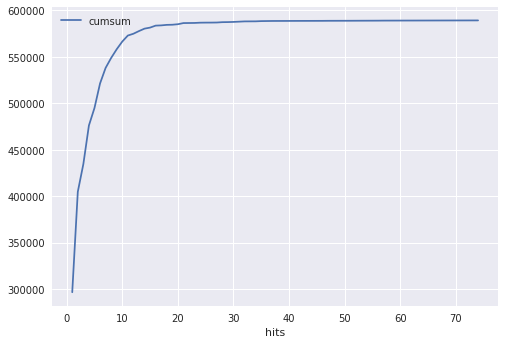

In [44]:
pd_sorted.plot(x='hits', y='cumsum')

In [45]:
df_ps_final = df_ps_final.drop("traceTimeentry")

In [46]:
categoricalFeatures = ['account', 'clientState', 'dataset', 'datasetScope', 'eventType', 'eventVersion', 'filename', 
                       'hostname', 'protocol', 'remoteSite', 'scope', 'traceId', 'traceIp', 'uuid', 'project', 
                       'run_number', 'stream_name', 'prod_step', 'datatype', 'dataset_version', 'hour', 'join_key_1']

encoded = df_ps_final

for elem in categoricalFeatures:
    encoded = encoded.withColumn(elem + "Hash", hash(encoded[elem]))

In [47]:
encoded.describe().toPandas()

summary   account         clientState  \
0  count   589283    589283               
1  mean    None      None                 
2  stddev  None      None                 
3  min     abell     CannotAuthenticate   
4  max     zmarshal  SourceNotFound       

                                                                                           dataset  \
0  589283                                                                                            
1  None                                                                                              
2  None                                                                                              
3  data12_8TeV.00200805.physics_MinBias.recon.NTUP_MINBIAS.r4768                                     
4  mc16_valid.361034.Pythia8EvtGen_A2MSTW2008LO_minbias_inelastic_low.merge.HITS.e3581_s3028_s2939   

  datasetScope eventType eventVersion                            filename  \
0  589283       589283    589283       589283                               
1  None         None      None         None                                 
2  None         None      None         None                                 
3  data12_8TeV  download  1.14.10      AOD.05341490._000446.pool.root.1     
4  mc16_valid   download  1.16.1       log.14217468._003414.job.log.tgz.1   

                   hostname protocol                 remoteSite        scope  \
0  589283                    589283   589283                     589283        
1  None                      None     None                       None          
2  None                      None     None                       None          
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK            data12_8TeV   
4  xenia.nevis.columbia.edu  srm      WUPPERTALPROD_SCRATCHDISK  mc16_valid    

                            traceId                    traceIp  \
0  589283                            589283                      
1  None                              None                        
2  None                              None                        
3  000006b4ce98452580a7493dba70ceb0  2001:1458:201:e4::100:28c   
4  ffffd5de42064e778bb14610ca50b1a6  ::ffff:91.239.204.45        

     traceTimeentryUnix         transferStart  \
0  589283                589283                 
1  1.5261951742501497E9  1.5261950767825077E9   
2  716920.4582917517     716914.0264712909      
3  1.525125633301146E9   1.524860531819739E9    
4  1.527803987107225E9   1.527803946887522E9    

                               uuid           hour      project  \
0  589283                            589283         589283        
1  None                              None           None          
2  None                              None           None          
3  000397830f284c508523b44ed7d19aab  2018-05-01 00  data12_8TeV   
4  fffe0a61b053499da59d19fa07de8bbd  2018-05-31 23  mc16_valid    

           run_number                                  stream_name prod_step  \
0  589283              589283                                       589283     
1  350085.3422377267   None                                         None       
2  47777.010993275675  None                                         None       
3  00200805            AlpgenJimmy_AUET2_CTEQ6L1_WenugammagammaNp0  PhysCont   
4  periodL             physics_ZeroBias                             simul      

  datatype dataset_version                                       join_key_1  \
0  589283   589283          589283                                            
1  None     None            None                                              
2  None     None            None                                              
3  AOD      c1128_m1842     AOD.05341490._000446.pool.root.12018-05-16 13     
4  log      x563_m1972      log.14217468._003414.job.log.tgz.12018-05-31 19   

                 hits       filesize_double           accountHash  \
0  589283              589283                589283               

In [49]:
encoded.write.format("json").save("/user/sprenner/training_official_mai_hourly.json")